!pip install pydotplus

week6/decision_tree_regression.ipynb

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]
customers['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
# # This is the model we'll be using.
# from sklearn import tree

# # A convenience for displaying visualizations.
# from IPython.display import Image

# # Packages for rendering our tree.
# import pydotplus
# import graphviz

# Initialize and train our tree.
# decision_tree = tree.DecisionTreeClassifier(
#     criterion='entropy',
#     max_features=1,
#     max_depth=4,
#     random_state = 1337
# )
# decision_tree.fit(customers, repeat_customer)

# # Render our tree.
# dot_data = tree.export_graphviz(
#     decision_tree, out_file=None,
#     feature_names=customers.columns,
#     class_names=['Not Returning', 'Returning'],
#     filled=True
# )
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [4]:
X = customers.drop(columns='repeat')
y = customers['repeat']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
model.score(X_train, y_train)

1.0

In [8]:
model.score(X_test, y_test)

-1.0

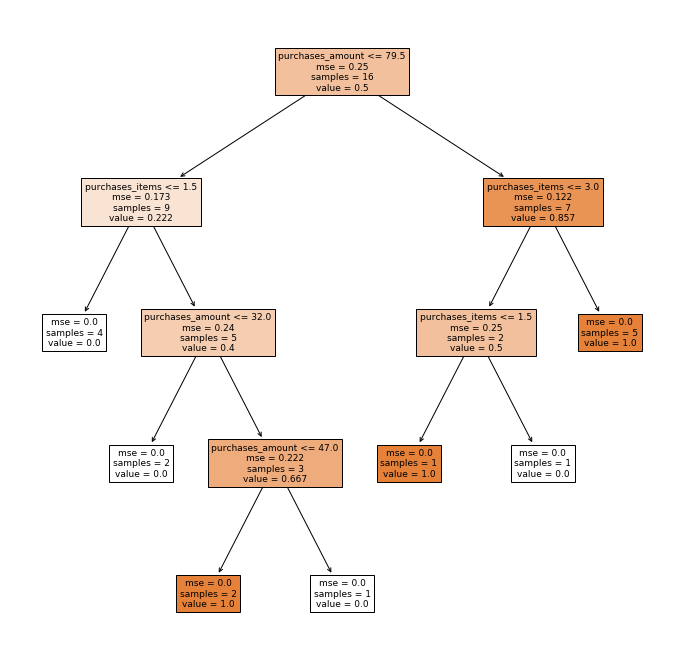

In [10]:
plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.875
test score: -3.0


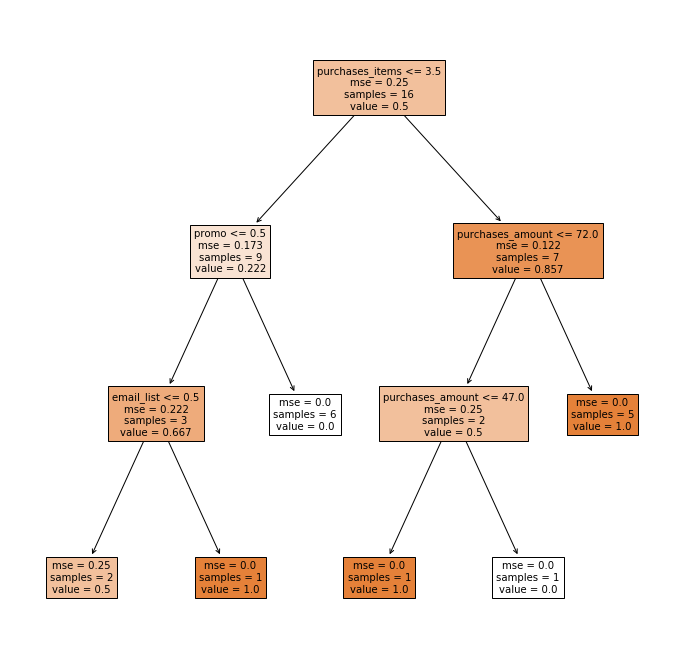

In [12]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.39682539682539675
test score: -0.4094230284706475


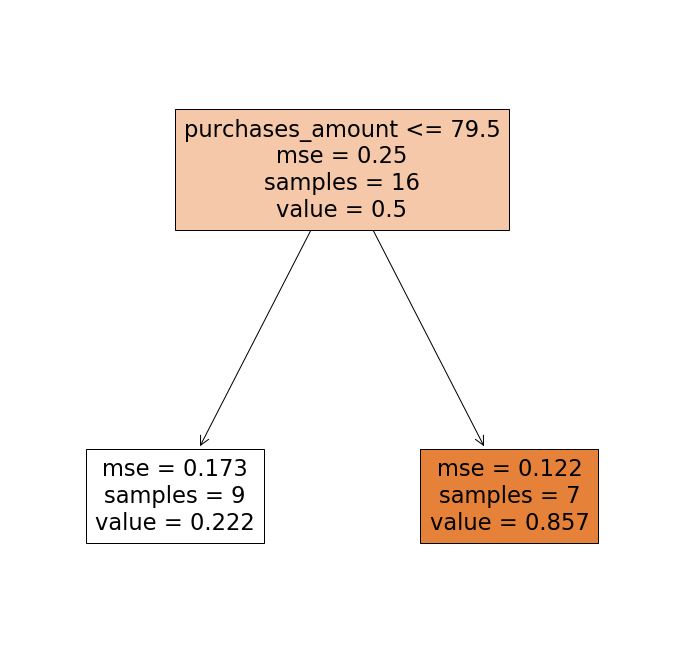

In [15]:
model = DecisionTreeRegressor(max_leaf_nodes=2)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure(figsize=(12, 12))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()